In [1]:
import numpy as np
k = 3
U = np.array([[0.5,4.5], [2.2,1.6],[3,3.5]])
X = np.array([[0.5, 4.5],[2.2, 1.5], [3.9, 3.5], [2.1, 1.9], [0.5, 3.2], [0.8, 4.3], [2.7, 1.1], [2.5, 3.5], [2.8, 3.9], [0.1, 4.1]])
cov = np.array([np.identity(X.shape[1]), np.identity(X.shape[1]), np.identity(X.shape[1])])
p = np.array([1/k, 1/k, 1/k])
w = np.zeros((k, X.shape[0]))
f = np.zeros((k, X.shape[0]))
f1 = np.zeros((k, X.shape[0]))
n = np.zeros((X.shape[0]))

In [2]:
for d in range(1):
    for i in range(k):
        for j in range(X.shape[0]):
            A = np.matmul(np.linalg.inv(cov[i]), np.transpose(X[j,:] - U[i,:]))
            f[i,j] = (np.exp(-(np.matmul(A, X[j,:] - U[i,:]))/2))/(((np.linalg.det(cov[i]))**(0.5))*((2*np.pi)**(X.shape[1]/2)))
    
    for j in range(X.shape[0]):
        n[j] = np.matmul(f[:,j], p) 
    
    for i in range(k):
        for j in range(X.shape[0]):
            w[i,j] = (f[i,j]*p[i])/(n[j])  
    
    for i in range(k):
        U[i] = np.matmul(w[i], X)/np.sum(w[i])
    
    Z = np.zeros((k, X.shape[0], X.shape[1]))
    for i in range(k):
        Z[i] = np.array([X - U[i]])
    r = np.zeros((X.shape[0]+1, X.shape[1], X.shape[1]))
    cov = np.zeros((k, X.shape[1], X.shape[1]))
    
    for i in range(k):
        for j in range(X.shape[0]):
            r[j] = (w[i,j]*(np.matmul(Z[i][j,:].reshape(2,1), np.transpose(Z[i][j,:].reshape(2,1)))))/np.sum(w[i,:])
        cov[i]= np.sum(r,axis = 0) 
        
    for i in range(k):
        p[i] = np.sum(w[i,:])/w.shape[1]       

In [3]:
U

array([[0.55037786, 4.04016951],
       [2.30305907, 1.74332438],
       [2.8712064 , 3.44305963]])

In [4]:
cov

array([[[ 0.23287198, -0.02474452],
        [-0.02474452,  0.23947182]],

       [[ 0.26330558, -0.12450136],
        [-0.12450136,  0.5581009 ]],

       [[ 0.71288241,  0.05977917],
        [ 0.05977917,  0.43528609]]])

In [5]:
p

array([0.38217867, 0.30667264, 0.3111487 ])

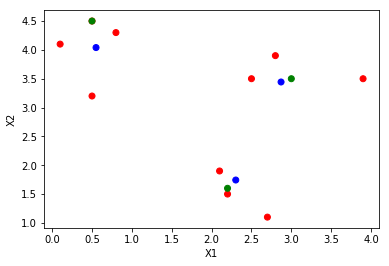

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
X1 = [0.5, 2.2, 3.9, 2.1, 0.5, 0.8, 2.7, 2.5, 2.8, 0.1, 0.55037786, 2.30305907, 2.8712064, 0.5, 2.2, 3]
X2 = [4.5, 1.5, 3.5, 1.9, 3.2, 4.3, 1.1, 3.5, 3.9, 4.1, 4.04016951, 1.74332438, 3.44305963, 4.5, 1.6, 3.5]
color =['D', 'D', 'D', 'D', 'D', 'D','D', 'D', 'D','D', 'E', 'E', 'E', 'F', 'F', 'F']

df = pd.DataFrame(dict(X1=X1, X2=X2, color=color))

fig, ax = plt.subplots()

colors = {'D':'red', 'E':'blue','F':'green'}

ax.scatter(df['X1'], df['X2'], c=df['color'].apply(lambda x: colors[x]))

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
